<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Speed          51 non-null     int64
 1   Stopping_dist  51 non-null     int64
dtypes: int64(2)
memory usage: 944.0 bytes


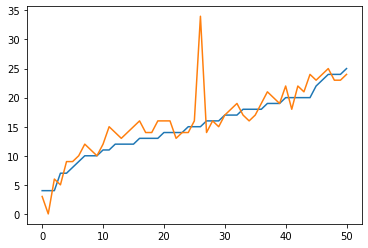

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('mycar_lin.csv')
df.info()
df.describe()
plt.plot(df)


## Моделирование проведения данных. Прогнозирование. Пример
## Линейная регрессия. Простая и множественная. Математическая 
## формулировка. 
### Прочитай https://habr.com/ru/post/350668/?

16.0
25-й перцентиль:13.5, 75-й перцентиль: 19.5, IQR: 6.0,  Гарницы выбросов: [4.5, 28.5].


count    48.000000
mean     16.270833
std       4.814604
min       5.000000
25%      14.000000
50%      16.000000
75%      19.250000
max      25.000000
Name: Stopping_dist, dtype: float64

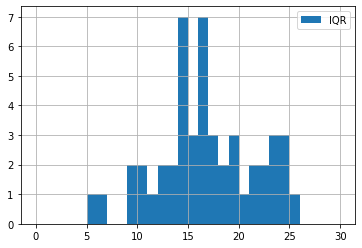

In [3]:
median = df.Stopping_dist.median()
print(median)
IQR = df.Stopping_dist.quantile(0.75, interpolation='midpoint') - df.Stopping_dist.quantile(0.25, interpolation='midpoint')
perc25 = df.Stopping_dist.quantile(0.25, interpolation='midpoint')
perc75 = df.Stopping_dist.quantile(0.75, interpolation='midpoint')
print('25-й перцентиль:{},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),"Гарницы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR,
                                                                    l=perc75+1.5*IQR))

df.Stopping_dist.loc[df.Stopping_dist.between(perc25-1.5*IQR,
                                              perc75+1.5*IQR)].hist(bins=30,
                                                                    range=(0,30),
                                                                    label='IQR')
plt.legend()
df = df.loc[df.Stopping_dist.between(perc25-1.5*IQR,
                                perc75+1.5*IQR)]
df.Stopping_dist.describe()

## Разбиение данных на тестовые и обучающие Синтаксис. Примеры.
## Функция map()**.Синтаксис. Пример
## Оценка качества модели.
## Метрики: MAE(среднее арифметическое модуля отклонения 
## предсказанного значения от реального). Пример.
## Метрики: RMSE(квадратный корень из MAE). Пример.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = df.iloc[:,0:1].values
Y = df.iloc[:,1].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
my_model = LinearRegression()
my_model.fit(X_train, Y_train)

y_pred = my_model.predict(X_test)
print(my_model.intercept_,my_model.coef_)

print('MAE:', metrics.mean_absolute_error(Y_test,y_pred))

print('MSE:', metrics.mean_squared_error(Y_test, y_pred))

print('R_2:', metrics.r2_score(Y_test,y_pred))

0.6198245614035081 [1.00289474]
MAE: 1.392040935672515
MSE: 2.7945944182825486
R_2: 0.8544482073811173


In [62]:
len(Y_train)

33

## Метрики: коэффициент детерминации. Примеры
## Проанализировать файл mycar_lin.csv на наличие выбросов. Опишите 
## результаты исследования. Графики.
## Построить модель прогнозирования тормозного пути. Файл с данными 
## mycar_lin.csv Опишите построенную модель и ее характеристики.

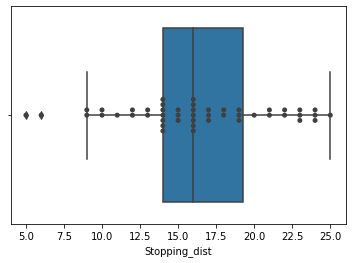

In [26]:
import seaborn as sns



sns.boxplot(x='Stopping_dist', data=df)
ax = sns.swarmplot(x="Stopping_dist", data=df, color=".25")

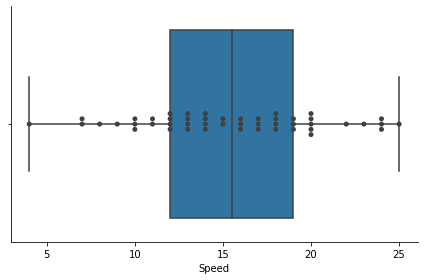

In [38]:
g = sns.catplot(x="Speed",data=df, kind="box",
                height=4, aspect=1.5)
ax = sns.swarmplot(x="Speed", data=df, color=".25")

Text(0, 0.5, 'y')

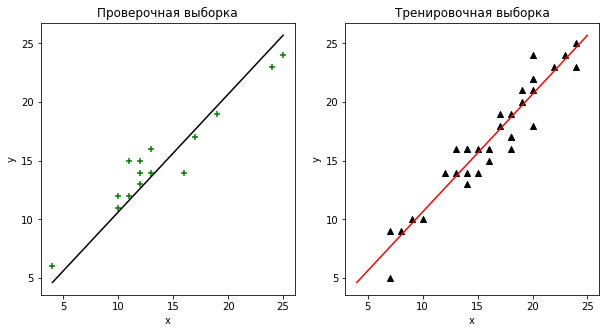

In [30]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(10, 5))

x = [df.Speed.min(),df.Speed.max()]
y=my_model.intercept_+x*my_model.coef_

ax1.scatter(X_test, Y_test, marker='+', c='g')
ax1.plot(x,y, c='k')
ax1.set_title('Проверочная выборка')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax2.scatter(X_train, Y_train, marker='^', c='k' ,edgecolors='k')
ax2.plot(x,y, c='r')
ax2.set_title('Тренировочная выборка')
ax2.set_xlabel('x')
ax2.set_ylabel('y')